# Predicción de Obesidad

## Obtencion de los datos

Los datos están contenidos en el fichero `bmi.csv`.

Importamos Numpy, Panda, Matplotlib y Seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = './bmi.csv'
bmidata = pd.read_csv(file_path)

In [4]:
bmidata.describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


## Muestras generales del dataset.

In [5]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [6]:
bmidata["BmiClass"].unique()

array(['Obese Class 1', 'Overweight', 'Underweight', 'Obese Class 2',
       'Obese Class 3', 'Normal Weight'], dtype=object)

In [7]:
bmidata["BmiClass"].replace(['Normal Weight', 'Obese Class 2', 'Underweight', 'Obese Class 3',
       'Overweight', 'Obese Class 1'], [1., 4., 0., 5., 2., 3.],inplace=True)
bmidata

C:\Users\donai\AppData\Local\Temp\ipykernel_7940\177178419.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmidata["BmiClass"].replace(['Normal Weight', 'Obese Class 2', 'Underweight', 'Obese Class 3',
C:\Users\donai\AppData\Local\Temp\ipykernel_7940\177178419.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,3.0
1,60,1.71,79.02,27.023700,2.0
2,60,1.55,74.70,31.092612,3.0
3,60,1.46,35.90,16.841809,0.0
4,60,1.58,97.10,38.896010,4.0
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,2.0
737,44,1.91,106.90,29.302925,2.0
738,25,1.82,88.40,26.687598,2.0
739,35,1.88,98.50,27.868945,2.0


### Un gráfico de cada uno de los atributos.

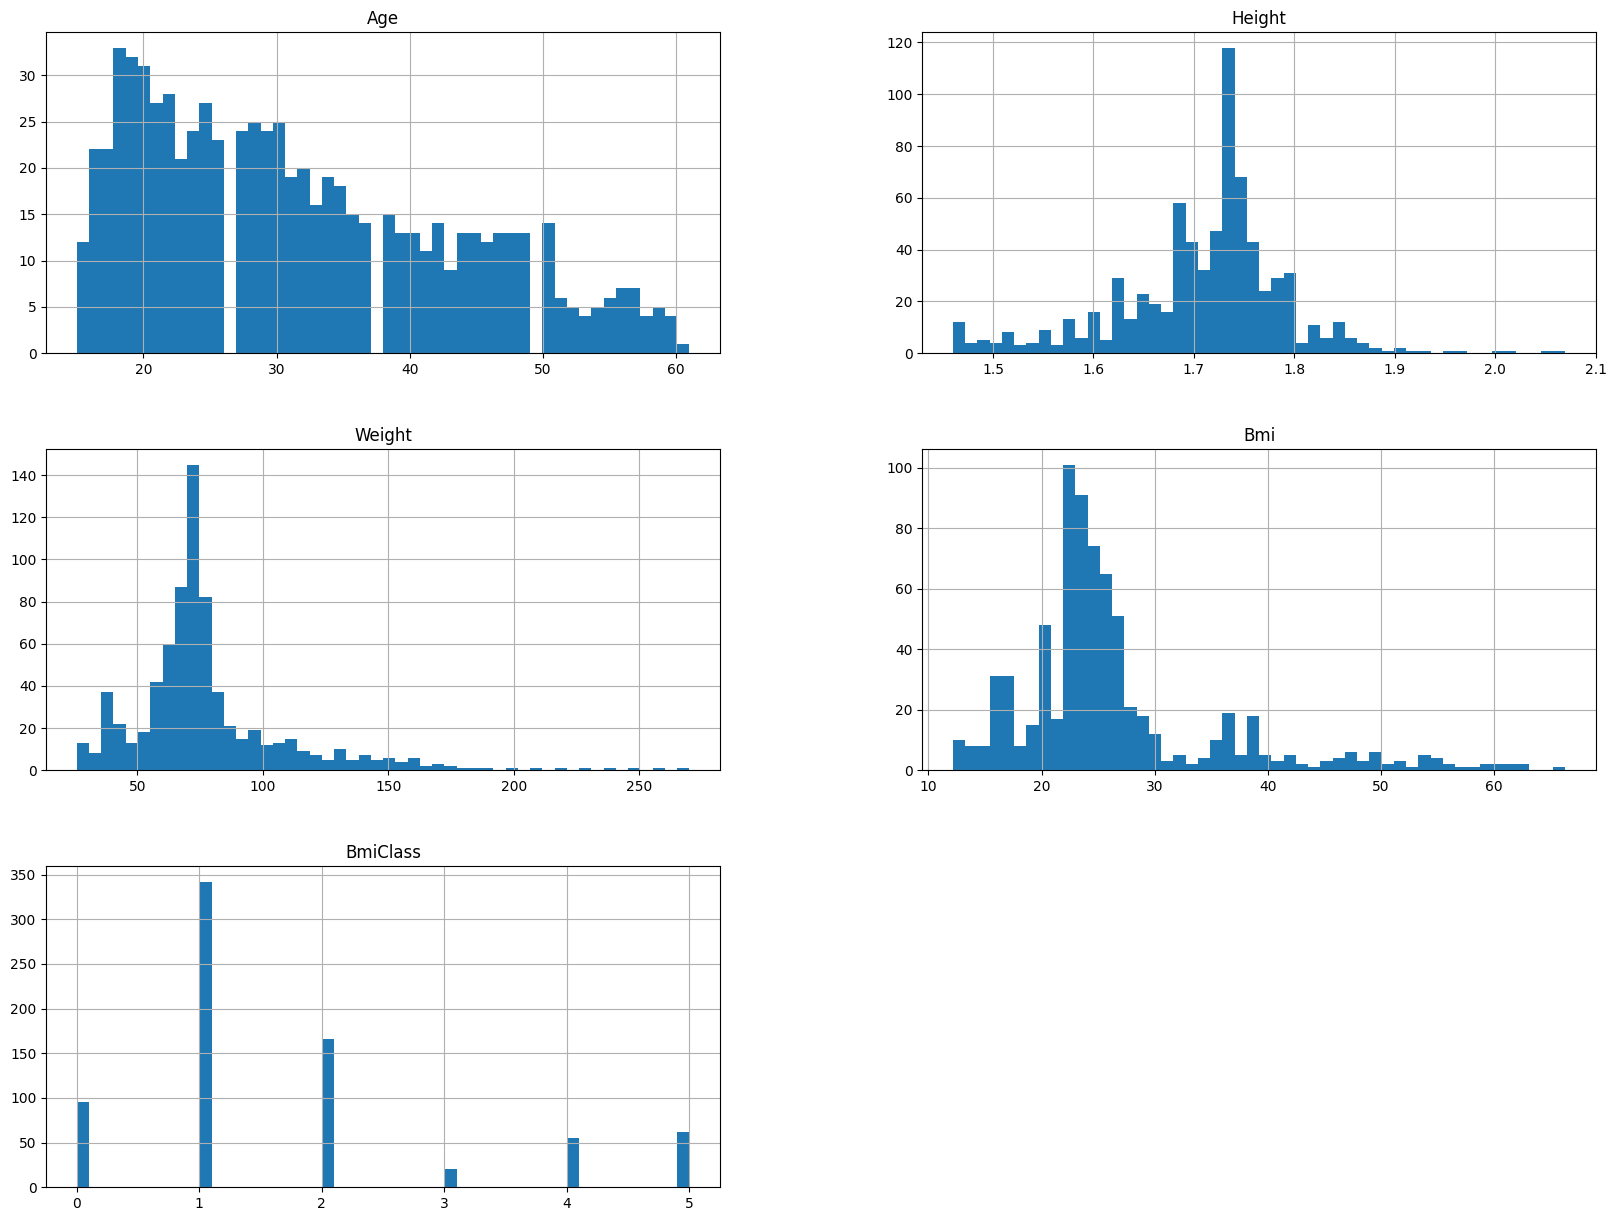

In [8]:
#Un gráfico de cada uno de los atributos.
bmidata.hist(bins=50 ,figsize=(20, 15))
plt.show()

In [9]:
# Matriz de correlaciones(vemos las correlaciones entre todos los atributos)
corr_matrix = bmidata.corr()
corr_matrix

,Age,Height,Weight,Bmi,BmiClass
Age,1.000000,0.023128,0.109610,0.139157,0.159871
Height,0.023128,1.000000,0.607672,0.433309,0.399488
Weight,0.109610,0.607672,1.000000,0.966921,0.903499
Bmi,0.139157,0.433309,0.966921,1.000000,0.950616
BmiClass,0.159871,0.399488,0.903499,0.950616,1.000000


In [10]:
# Relación de cada uno de los atributos con la edad de los empleados(Un ejemplo)

corr_matrix["Age"].sort_values(ascending=False)

Age         1.000000
BmiClass    0.159871
Bmi         0.139157
Weight      0.109610
Height      0.023128
Name: Age, dtype: float64

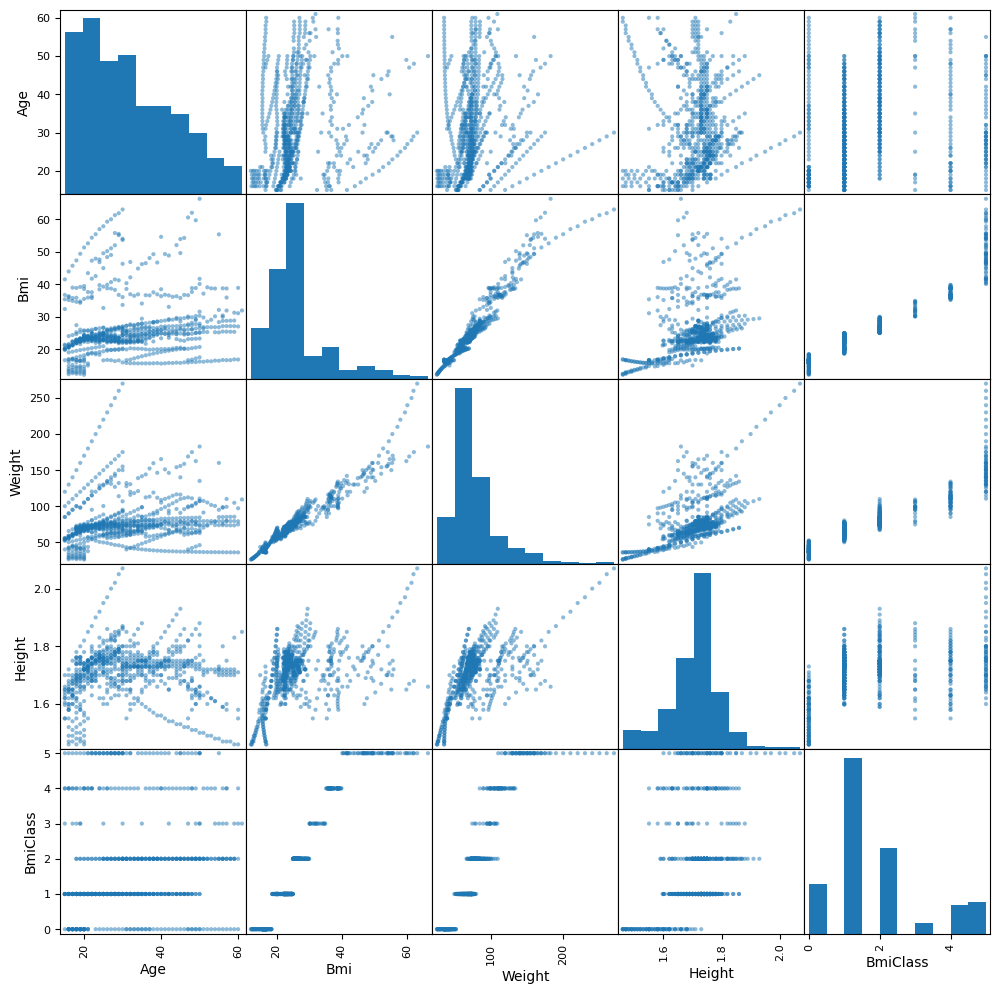

In [11]:
# Gráfico de correlaciones de 5 atributos importantes

from pandas.plotting import scatter_matrix

attributes = ["Age","Bmi","Weight","Height","BmiClass"]
pd.plotting.scatter_matrix(bmidata[attributes], figsize=(12,12))
plt.show()

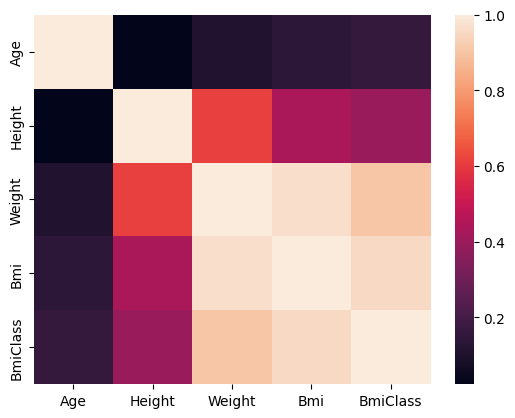

In [12]:
sns.heatmap(corr_matrix)
plt.show()

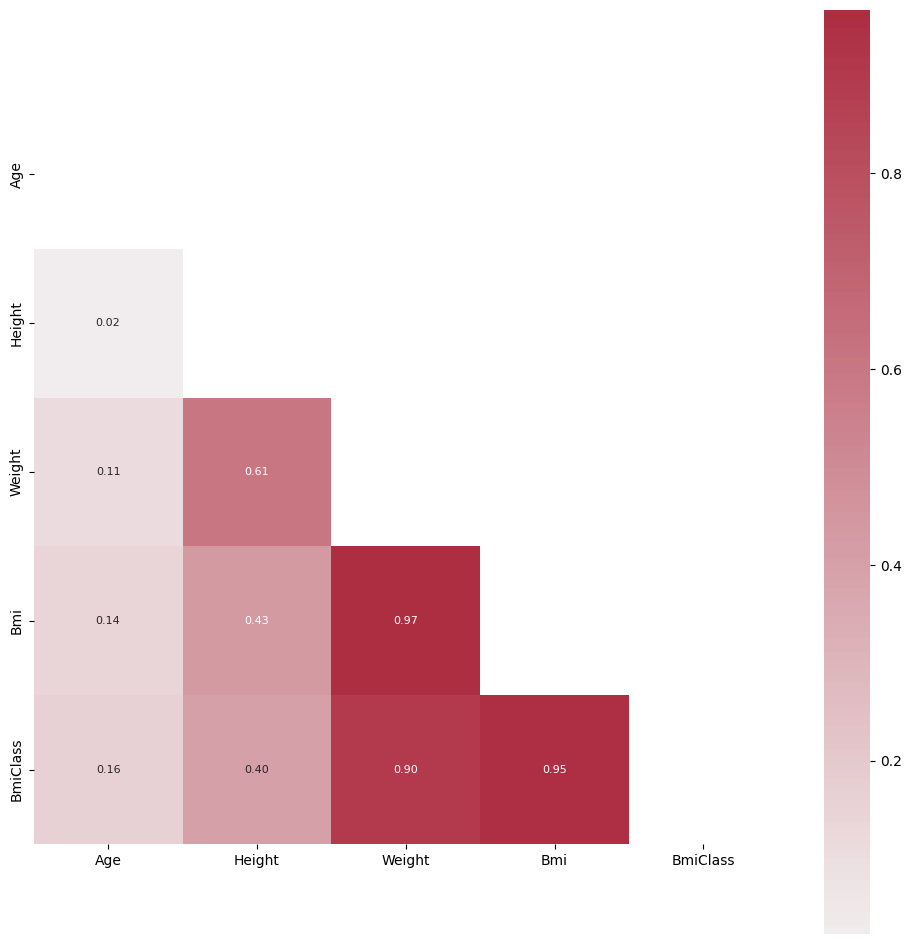

In [13]:
# Igual pero más intuitivo

# Crea una máscara
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crea una paleta personalizada
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, annot_kws={"size": 8})
plt.show()

## Combinaciones de atributos (featuring engineering)

In [14]:
bmidata

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,3.0
1,60,1.71,79.02,27.023700,2.0
2,60,1.55,74.70,31.092612,3.0
3,60,1.46,35.90,16.841809,0.0
4,60,1.58,97.10,38.896010,4.0
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,2.0
737,44,1.91,106.90,29.302925,2.0
738,25,1.82,88.40,26.687598,2.0
739,35,1.88,98.50,27.868945,2.0


### Mezcla de datos

Antes de trocear el dataset, vamos a "barajarlo" para asegurarnos que no tenemos los datos agrupados por algún criterio

El método `sample()`extrae una muestra aleatoria del dataframe.

In [15]:
# extrae la mitad del dataframe de forma aleatoria

bmidata.sample(frac=0.5)

,Age,Height,Weight,Bmi,BmiClass
119,42,1.730,74.3,24.825420,1.0
610,26,1.820,132.0,39.850260,4.0
400,23,1.750,74.0,24.163265,1.0
521,18,1.780,150.0,47.342507,5.0
505,19,1.530,33.6,14.353454,0.0
...,...,...,...,...,...
691,21,1.670,56.2,20.151314,1.0
448,21,1.721,70.5,23.802763,1.0
264,30,1.650,61.0,22.405877,1.0
599,40,1.740,165.3,54.597701,5.0


In [16]:
# extrae todo el dataframe de forma aleatoria

bmidata.sample(frac=1)

,Age,Height,Weight,Bmi,BmiClass
318,27,2.000,240.000,60.000000,5.0
90,46,1.860,70.000,20.233553,1.0
739,35,1.880,98.500,27.868945,2.0
516,18,1.738,69.099,22.875585,1.0
578,15,1.620,85.000,32.388355,3.0
...,...,...,...,...,...
311,27,1.770,74.700,23.843723,1.0
361,25,1.770,78.000,24.897060,1.0
173,36,1.750,81.090,26.478367,2.0
20,57,1.600,99.100,38.710937,4.0


In [17]:
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,3.0
1,60,1.71,79.02,27.023700,2.0
2,60,1.55,74.70,31.092612,3.0
3,60,1.46,35.90,16.841809,0.0
4,60,1.58,97.10,38.896010,4.0


In [18]:
bmidata = bmidata.sample(frac=1)
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
62,50,1.660,110.50,40.100160,5.0
560,16,1.700,105.00,36.332180,4.0
405,23,1.746,74.40,24.405317,1.0
431,21,1.740,71.79,23.711851,1.0
178,36,1.680,68.40,24.234694,1.0


In [19]:
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
62,50,1.660,110.50,40.100160,5.0
560,16,1.700,105.00,36.332180,4.0
405,23,1.746,74.40,24.405317,1.0
431,21,1.740,71.79,23.711851,1.0
178,36,1.680,68.40,24.234694,1.0


In [20]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 62 to 471
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 34.7 KB


### Separación de la matriz de características $X$ de los datos de salida $y$ (el target).

Aquí ya buscamos de objetivo el valor de obesidad.

In [21]:
y = bmidata["BmiClass"]
y

62     5.0
560    4.0
405    1.0
431    1.0
178    1.0
      ... 
352    1.0
395    1.0
213    0.0
535    0.0
471    1.0
Name: BmiClass, Length: 741, dtype: float64

In [22]:
X = bmidata.drop("BmiClass", axis=1)
X

,Age,Height,Weight,Bmi
62,50,1.660,110.50,40.100160
560,16,1.700,105.00,36.332180
405,23,1.746,74.40,24.405317
431,21,1.740,71.79,23.711851
178,36,1.680,68.40,24.234694
...,...,...,...,...
352,25,1.739,72.08,23.835025
395,23,1.771,74.21,23.660576
213,33,1.600,44.00,17.187500
535,18,1.500,30.30,13.466667


### Creación de los datos de entrenamiento y de prueba

Separamos el dataset en dos partes:

* Datos de entreamiento (training set) - 80%
* Datos de prueba (test set) - 20%

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
X_train

,Age,Height,Weight,Bmi
378,24,1.92,210.00,56.966146
668,45,1.67,63.50,22.768834
245,31,1.68,63.00,22.321429
54,50,1.73,79.28,26.489358
66,49,1.60,75.00,29.296875
...,...,...,...,...
694,22,1.68,57.50,20.372732
431,21,1.74,71.79,23.711851
16,57,1.72,85.10,28.765549
679,18,1.64,52.50,19.519631


In [25]:
y_train

378    5.0
668    1.0
245    1.0
54     2.0
66     2.0
      ... 
694    1.0
431    1.0
16     2.0
679    1.0
521    5.0
Name: BmiClass, Length: 592, dtype: float64

### Gráficas de prueba para ver si hay mucha diferencia entre los datos reales y los estimados.

<function matplotlib.pyplot.show(close=None, block=None)>

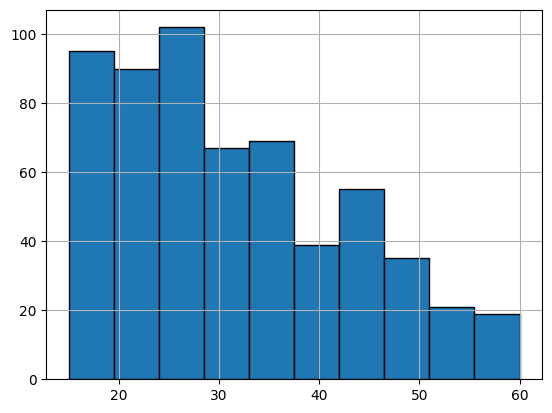

In [26]:
X_train["Age"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

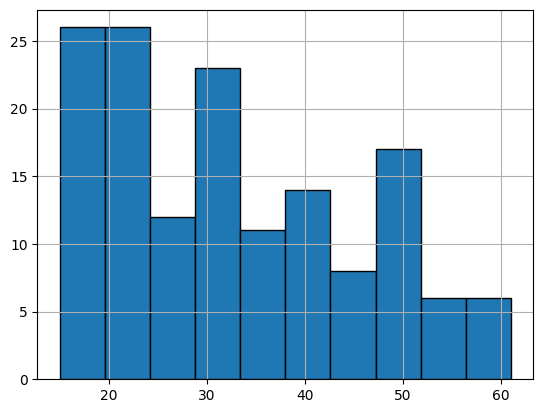

In [27]:
X_test["Age"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

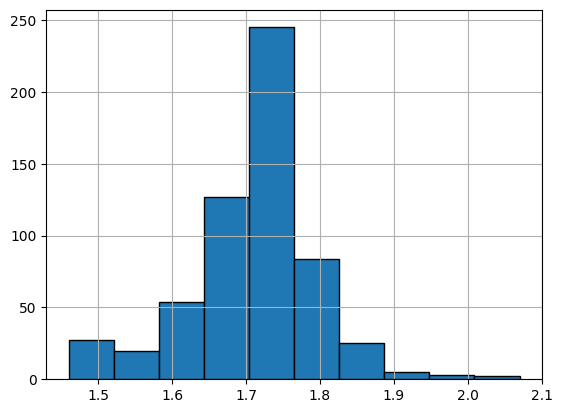

In [28]:
X_train["Height"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

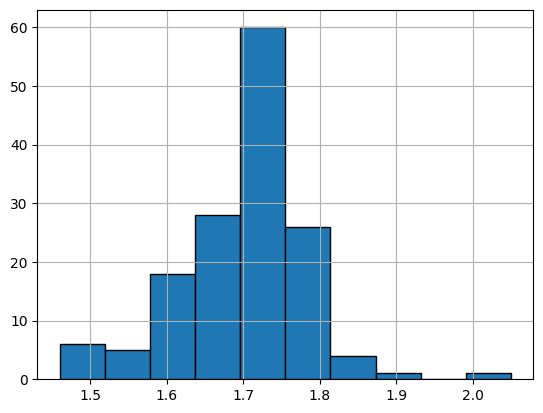

In [29]:
X_test["Height"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

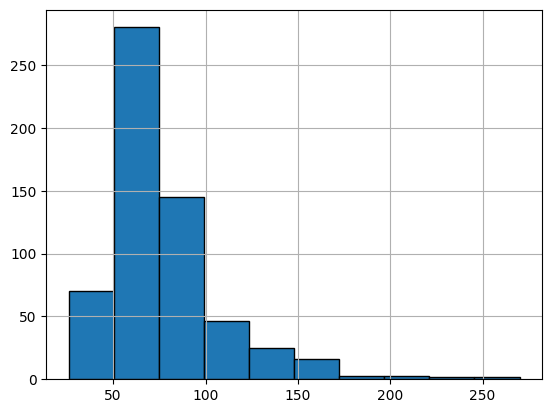

In [30]:
X_train["Weight"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

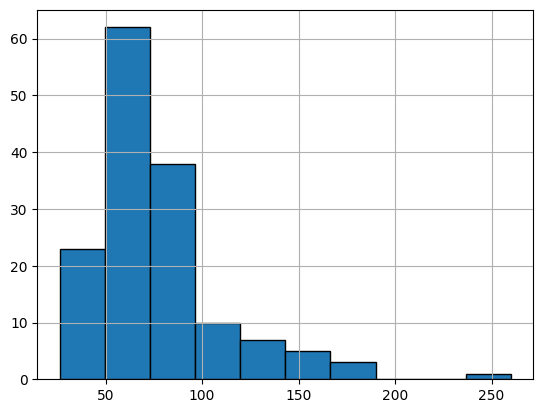

In [31]:
X_test["Weight"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

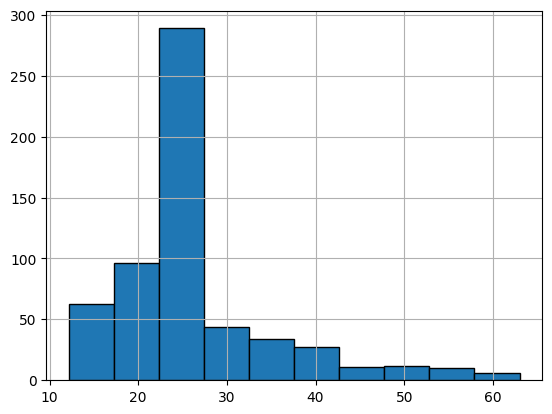

In [32]:
X_train["Bmi"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

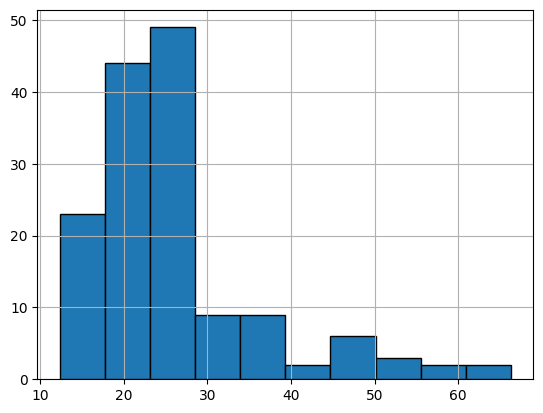

In [33]:
X_test["Bmi"].hist(edgecolor="black")
plt.show

## Modelo predictivo

### 3 Opciones

-Modelo de regresión
-Arbol de decisiones
-Random Forest

## DecisionTreeRegressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

bmidata_model_v2 = DecisionTreeRegressor()

# Entrenamiento del modelo
bmidata_model_v2.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v2.predict(X_test)

y_test_list = y_test.tolist()
s=0
print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  e_p = abs(100 - ((r - e) / r) * 100)
  s = s+e_p

  print (f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

print("precisión es ", s/20)

Prec. real    Prec. estimado   Error absoluto
      5.00           5.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      0.00           0.00              0.00
      1.00           1.00              0.00
      5.00           5.00              0.00
      5.00           5.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      5.00           5.00              0.00
      1.00           1.00              0.00
      5.00           5.00              0.00
      2.00           2.00              0.00
      4.00           4.00              0.00
      1.00           1.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      0.00           0.00              0.00
      1.00           1.00              0.00
precisión es  nan


C:\Users\donai\AppData\Local\Temp\ipykernel_7940\796434339.py:18: RuntimeWarning: invalid value encountered in scalar divide
  e_p = abs(100 - ((r - e) / r) * 100)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.08192319205190404
Coeficiente de determinación:  0.9967966633701681


c:\Users\donai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression

bmidata_model_v4 = LinearRegression()

# Entrenamiento del modelo
bmidata_model_v4.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v4.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
      5.00           5.27              0.27
      1.00           1.48              0.48
      1.00           1.52              0.52
      1.00           0.79              0.21
      0.00          -0.47              0.47
      1.00           1.16              0.16
      5.00           3.93              1.07
      5.00           5.59              0.59
      2.00           1.92              0.08
      1.00           1.27              0.27
      5.00           4.46              0.54
      1.00           1.38              0.38
      5.00           5.56              0.56
      2.00           1.64              0.36
      4.00           3.73              0.27
      1.00           0.79              0.21
      2.00           1.93              0.07
      1.00           0.84              0.16
      0.00           0.29              0.29
      1.00           1.05              0.05


In [37]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.4693487022598141
Coeficiente de determinación:  0.894857066174651


c:\Users\donai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## RandomForest

In [38]:
from sklearn.ensemble import RandomForestRegressor

bmidata_model_v3 = RandomForestRegressor()

# Entrenamiento del modelo
bmidata_model_v3.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v3.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  e_p = abs(100 - ((r - e) / r) * 100)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
      5.00           5.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      0.00           0.00              0.00
      1.00           1.00              0.00
      5.00           5.00              0.00
      5.00           5.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      5.00           5.00              0.00
      1.00           1.00              0.00
      5.00           5.00              0.00
      2.00           2.00              0.00
      4.00           4.00              0.00
      1.00           1.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      0.00           0.00              0.00
      1.00           1.00              0.00


C:\Users\donai\AppData\Local\Temp\ipykernel_7940\695676009.py:18: RuntimeWarning: invalid value encountered in scalar divide
  e_p = abs(100 - ((r - e) / r) * 100)


In [39]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.07317350897768524
Coeficiente de determinación:  0.9974443780367201


c:\Users\donai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
bmidata_model_v2.predict([[25, 1.80, 80]])

c:\Users\donai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but DecisionTreeRegressor is expecting 4 features as input.

In [ ]:
import joblib
joblib.dump(bmidata_model_v2,"entrenamiento_bmi.pkl")

['entrenamiento_bmi.pkl']